# Disengagement Analysis in Autonomous Vehicles

This project covers the implemention of statistical, probability concepts and Naive Bayes model 

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np  
import datetime
from scipy import stats as st
from statsmodels.stats import weightstats as stests

In [2]:
disf=pd.read_csv('mp1_av_disengagements.csv')
disf['Month']=pd.to_datetime(disf['Month'],format='%y-%b')


In [3]:
milesf=pd.read_csv('mp1_av_totalmiles.csv')
milesf['Month']=pd.to_datetime(milesf['Month'],format='%y-%b')

In [4]:
disf.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [5]:
milesf.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,2014-09-01,WDD2221851A001072,4207,44,24,20
1,2014-10-01,WDD2221851A001072,23971,228,100,128
2,2014-11-01,WDD2221851A001072,15837,141,66,75
3,2014-12-01,WDD2221851A001072,9413,36,15,21
4,2015-01-01,WDD2221851A001072,18192,48,18,30


## Summarize the following information
### a. Total number of AV disengagements over the entire duration of available data
$$P(DPM){\rm{  =  }}{{{\rm{Total Number of Diseng}}} \over {{\rm{Total Number of miles}}}}$$

In [6]:
sum(milesf['total number of disengagements'])

1024

### b. Number of unique months that have recorded AV disengagements

In [7]:
milesf.Month.unique()
len(milesf.Month.unique())

15

In [8]:
disf.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


### c. List of unique locations of AV disengagements

In [9]:
disf.Location.unique()

array(['urban-street', 'highway'], dtype=object)

### d. Number of unique causes for AV disengagements

In [10]:
disf.Cause.nunique()

10

### e. Which columns in the datasets (if any) have missing values? How many missing values do these column(s) have? (NAs (not valid entries) commonly occur in real world datasets…)

In [11]:
null_columns=disf.columns[disf.isnull().any()] #Check for null values in dataset
disf[null_columns].isnull().sum()      

ReactionTime    532
dtype: int64

In [12]:
disf.columns[disf.isnull().any()]

Index(['ReactionTime'], dtype='object')

# Plot a pie chart for the causes of AV disengagement. Based on the pie-chart, list the top 2 leading causes of disengagement?

/Users/megs/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


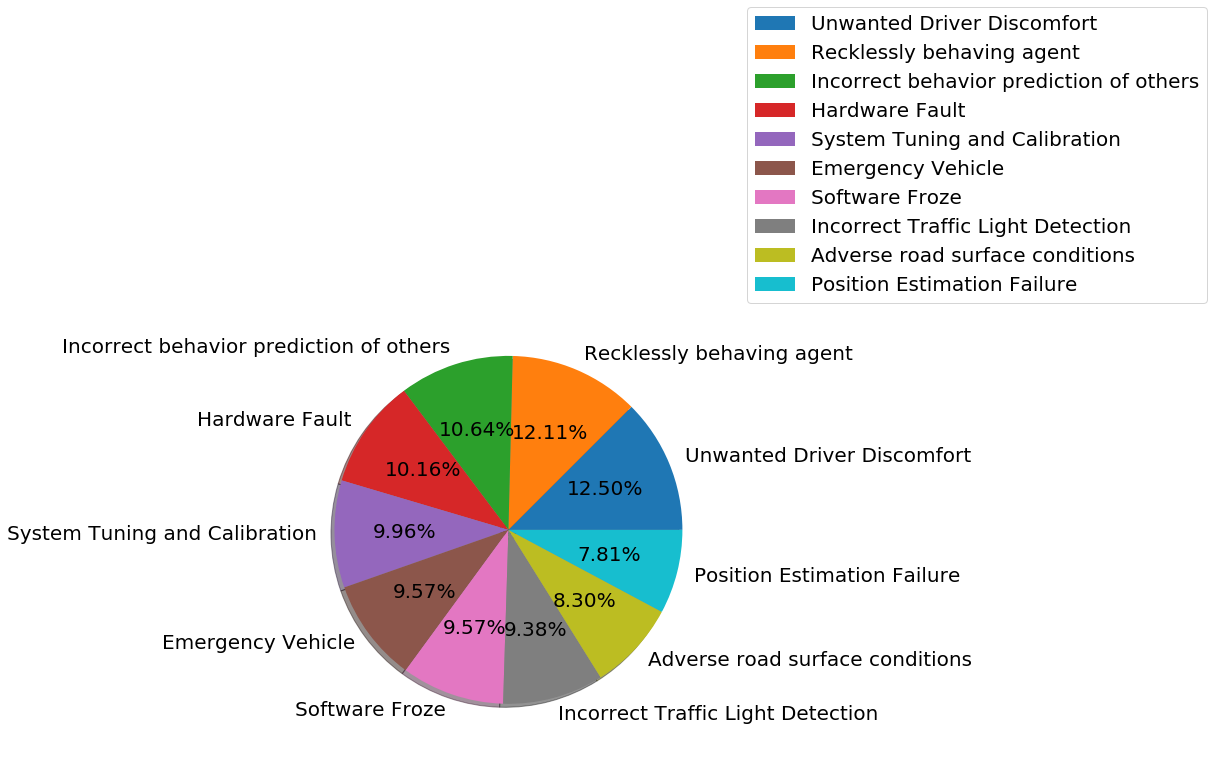

In [13]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0
causes = disf['Cause'].value_counts()

patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%1.2f%%', shadow=True)
plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(1.025,1.725),loc="upper left")
#plt.axis('equal',fontsize=40)
plt.show()

#### According to the pie chart the top 2 leading causes of disengagement are Unwanted Driver Discomfort & Recklessly behaving agent

In [14]:
causes = disf['Cause'].value_counts() #verifying the plot 
causes

Unwanted Driver Discomfort                 128
Recklessly behaving agent                  124
Incorrect behavior prediction of others    109
Hardware Fault                             104
System Tuning and Calibration              102
Emergency Vehicle                           98
Software Froze                              98
Incorrect Traffic Light Detection           96
Adverse road surface conditions             85
Position Estimation Failure                 80
Name: Cause, dtype: int64

## Visualize the trend of disengagement/mile over time with monthly granularity. How would you describe the trend? Are AV’s maturing over time?

Text(0.5, 1.0, 'Trend')

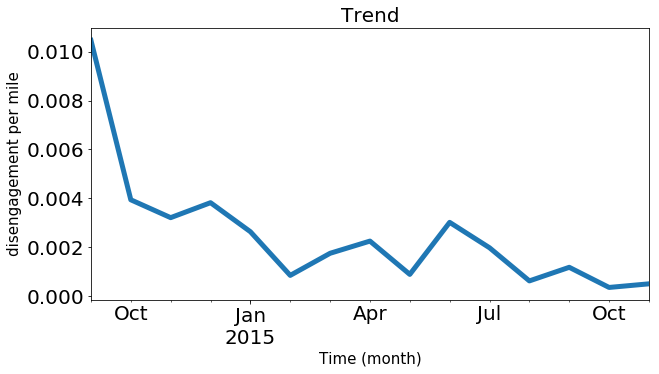

In [15]:
trend = milesf.groupby('Month').sum().reset_index()
trend['disengagement per mile'] = trend['total number of disengagements']/trend['miles driven in autonomous mode']
ax = trend.plot(x='Month',y='disengagement per mile',figsize=(10,5), linewidth=5, fontsize=20,legend=False)
ax.set_xlabel('Time (month)', fontsize=15)
ax.set_ylabel('disengagement per mile', fontsize=15)
ax.set_title('Trend', fontsize=20)

                           AV disnengagements are reducing with time.

# Task 1- Basic Analysis of AV Disengagements

## What do the following distributions signify about samples drawn from it?

### a. Gaussian distribution

PDF: ${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

Normal distributions are mostly used in natural and social sciences to represent real-valued random variables whose distributions are not known. Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples\of a random variable with finite mean and variance is itself a random variable whose distribution tends towards a normal distribution as the number of samples increases. 
This distribution also known as the “Bell Curve”. And because of the following features it is highly appreciated by the data scientists.
1-The mean, median and mode of normal distribution are equal plus it is symmetric around the  mean.
2-The curve is dependent on the mean and standard distribution of their data and it is very dense at the center and less dense at the tails.
3-Appoximately 95% of the area of the curve is within 2 standard deviations of the mean


### b. Exponential Distribution

PDF: $ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$

The exponential distribution occurs naturally when describing the lengths of the inter-arrival times in a homogeneous Poisson process.
The exponential distribution describes the amount of time between occurrences. 
E[X] is given by 1/ λ where λ Exponential Distribution .
Which means that as λ gets larger the less is the time between occurrences.
For Poisson equation, Exponential Distribution  is useful to model the random arrival pattern 


### c. Weibull distribution


$
{\displaystyle f(x;\lambda ,k)={\begin{cases}{\frac {k}{\lambda }}\left({\frac {x}{\lambda }}\right)^{k-1}e^{-(x/\lambda )^{k}}&x\geq 0,\\0&x<0,\end{cases}}}$

It is widely used in life like systems for the data analysis.
It has 2 parameters, 1- Beta as shape parameter and second is N a scale parameter.
If beta is less than 1, the probailty density tends to infinity at time ~zero
If beta is equal to 1 the graph the failure rate is fairly constant.
If beta is greater than 1 the failures rate increases as time increases.


## If the AV suddenly disengages, there may not be enough time for the human to react.It is also possible, that the human is not sufficiently attentive while in the AV becauseof reliance on the technology. To understand the human alertness level, we measure the reaction time of the human driver in the field. Plot the probability distribution of reaction times. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the fit distribution signify?

/Users/megs/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/megs/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/megs/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of Reaction Times')

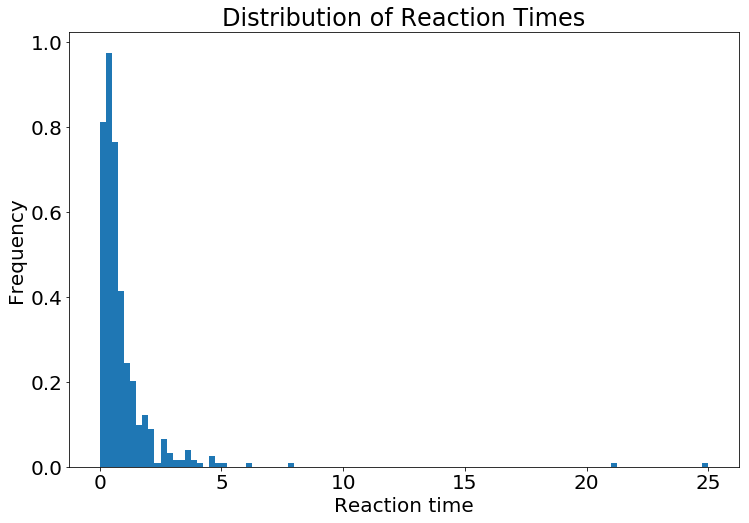

In [16]:
x = disf['ReactionTime']
plt.hist(x, normed=True, bins=100)
plt.xlabel('Reaction time')
plt.ylabel('Frequency')
plt.title('Distribution of Reaction Times')

According to the plot it can be inferred that the distribution follows weibul distribution which shows that the probability of the reaction time being high for human beings is very low.

## Compute the average reaction time

### a. For the entire duration of the dataset

In [17]:
avg_reaction_time = disf['ReactionTime'].mean()
print(avg_reaction_time)

0.9297703252032521


### b. For the entire duration of the dataset differentiated by the location of disengagement

In [18]:
avg_reaction_time = disf.groupby('Location')['ReactionTime'].mean()
print(avg_reaction_time)

Location
highway         1.48000
urban-street    0.92865
Name: ReactionTime, dtype: float64


## It is known that the mean reaction time for humans in non-AV cars is 1.09 seconds. Is the mean reaction time for humans in AV cars different from non-AV cars? Perform a hypothesis testing at a 0.05 significance level.

In [19]:
reaction_time = list(disf[disf['ReactionTime'].notnull()]['ReactionTime'])
one_sample = st.ttest_1samp(reaction_time, 1.09)
print("t-statistic = %.3f \np-value = %.3f." % one_sample)
if one_sample[1] < 0.05:
    print("Reaction time for humans in AV cars is different from non-AV cars.")
else:
    print("Reaction time for humans in AV cars is not different from non-AV cars.")

t-statistic = -2.099 
p-value = 0.036.
Reaction time for humans in AV cars is different from non-AV cars.


## Plot the probability distribution of disengagements/mile with monthly granularity. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the distribution that fits signify?

Text(0.5, 1.0, 'Distribution of Disengagement per Mile')

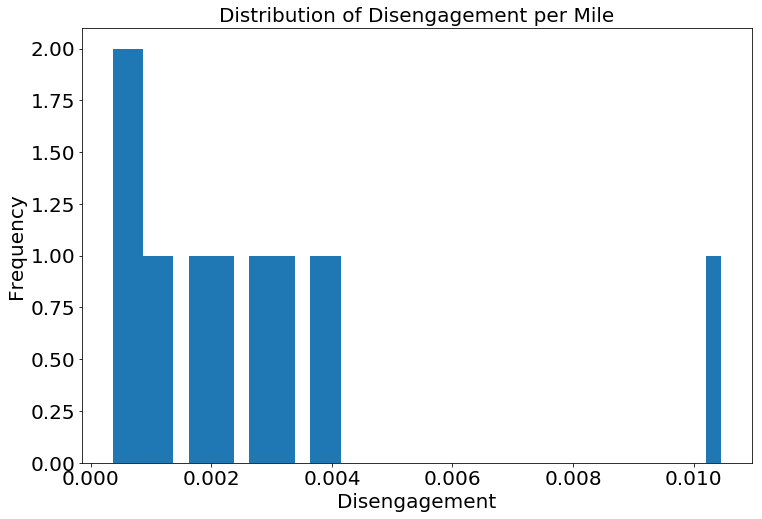

In [20]:
#ax = sns.kdeplot(milesf['diss/miles'])
trend['disengagement per mile'].plot(kind='hist',bins=40)
plt.xlabel('Disengagement')
plt.ylabel('Frequency')
plt.title('Distribution of Disengagement per Mile', fontsize=20)

The distribution mostly fits an exponential distribution. The disengagement per mile is decreasing continuously expect for a few values which are rising. These values can be considered as outliers. We will be able to have a much better idea of the fit with a larger dataset.

# Task 2 - Probabilistic Analysis of AV Disengagement
### a. 
The assumption on maximum number of disengagements in a mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a **bernoulli distribution**.

### b. Based on the above assumptions, calculate the probability of disengagement per mile on a cloudy day.
$$P(dpm){\rm{  =  }}{{{\rm{Total Diseng}}} \over {{\rm{Total miles}}}}$$

Using Bayes Theorem,

$$P(dpm|cloudy) = {{P(cloudy|dpm)P(dpm)} \over {P(cloudy)}}$$

In [21]:
total_diseng = milesf['total number of disengagements'].sum()
miles_drives= milesf['miles driven in autonomous mode'].sum()
prob_dis= total_diseng/miles_drives
#print("P(dpm):",prob_dis)
prob_cloudy = 1-0.72  #Given prob clear weather is 0.72
cloudy = disf['Weather']=='cloudy'
prob_dpm_cloudy = (sum(cloudy) / len(disf)) * prob_dis / prob_cloudy
print("P(dpm|cloudy):",prob_dpm_cloudy)

P(dpm|cloudy): 0.00590255677552725


### c.  Based on the above assumptions, calculate the probability of disengagement per mile on a clear day.
Using Bayes theorem,
$$P(dpm|clear) = {{P(clear|dpm)P(dpm)} \over {P(clear)}}$$

In [22]:
clear= ~cloudy
prob_dpm_clear =(sum(clear)/len(disf))*prob_dis/0.72
print("P(dpm|clear): ",prob_dpm_clear)
prob_clear = 0.72

P(dpm|clear):  0.0005195663748517999


### d. Similarly, calculate the probability of an automatic disengagement per mile on a cloudy day, and the probability of an automatic disengagement per mile on a clear day.
Using the axioms of probability we can rearrange the formulas as follows:

$$P(auto,dpm|cloudy) = \frac{{P(auto,dpm,cloudy)}}{{P(cloudy)}} = \frac{{P(auto,cloudy|dpm)P(dpm)}}{{P(cloudy)}}$$

$$P(auto,dpm|clear) = \frac{{P(auto,dpm,clear)}}{{P(clear)}} = \frac{{P(auto,clear|dpm)P(dpm)}}{{P(clear)}}$$

In [23]:
auto = disf['TypeOfTrigger']=='automatic'
cloudyauto=(cloudy & auto)
likelihood_cloudy=(sum(cloudyauto)/len(disf))
prob_dpm_cloudy_auto=likelihood_cloudy*prob_dis/prob_cloudy
clearauto=(clear & auto)
likelihood_clear=(sum(clearauto) / len(disf))
prob_dpm_clear_auto=likelihood_clear*prob_dis/prob_clear
print("P(auto,dpm|cloudy):",(prob_dpm_cloudy_auto))
print("P(auto,dpm|clear):",(prob_dpm_clear_auto))

P(auto,dpm|cloudy): 0.0028063653172267287
P(auto,dpm|clear): 0.00026390673008345393


### e. How likely is it that in 12000 miles, there are 150 or more disengagements under cloudy conditions? [Hint: Think of an appropriate approximation that makes the computation feasible/easier.]
We can assume that the distribution is normal. For a normal distribution, we know that
            $$\mu  = np = 12000 \times P(dpm |cloudy)$$
            $${\sigma ^2} = np(1 - p) = 12000 \times P(dpm |cloudy)(1 - P(dpm |cloudy))$$
            
Then we can use mean and std to calculate the z-value which then be used to calculate the p-value.   

In [24]:
mean = 12000*prob_dpm_cloudy
std = np.sqrt(12000*prob_dpm_cloudy*(1-prob_dpm_cloudy))
z=(150-mean)/std
print('Mean=',mean)
print('Std=',std)
print('z-score=',z)
p_value = st.norm.sf(abs(z))
print('p-value=',p_value)
print('Probability of 150 or more disengagements in 12000 miles under cloudy conditions is',p_value)

Mean= 70.830681306327
Std= 8.391221555200836
z-score= 9.43477873547556
p-value= 1.9591016830538447e-21
Probability of 150 or more disengagements in 12000 miles under cloudy conditions is 1.9591016830538447e-21



### a. What does the normal distribution represent in the hypothesis testing?
In Hypothesis testing, the hypothesis tests of a population mean is performed using the normal distribution. It is necessary to generalize the hypothesis test results to a population. Also, the normal test will work if the data come from a simple, random sample and the population is approximately normally distributed, or the sample size is large. Normal Distribution in hypothesis testing basically helps in determining if the sample that has been tested falls in the critical areas. If that's the case, then according to the concept of Hypothesis testing, null hypothesis gets rejected and alternative testing gets considered. The 'two-tailed' test is derived from testing the area under both tails of a normal distribution too. It helps in giving an estimate of what is possible. Assuming a normal distribution also lets us determine how meaningful the result we observe in a study is. For eg: The higher or lower the z-score in Hypothesis testing, the more unlikely the result is to happen by chance and the more likely the result is meaningful.

### b. Does rejecting the null hypothesis mean accepting the alternative hypothesis?Explain your answer.
In the hypothesis testing, both the Ho and Ha are assumed to be two sides of an extreme i.e either having Ho or the Ha probability. If null hypothesis means that there is no variation perhaps the statistical significance in the set of observations considered then rejecting this hypothesis eventually signifies the only other possibility left i.e Ha. 


### At the 0.05 significance level, test the following hypothesis: The AV has more disengagements (automatic and manual) on cloudy days than clear days. Based on the result of the hypothesis test, what can you conclude about the impact of weather conditions on AV safety?

$$\eqalign{& {H_o}:{\text{ Number of disengagement in cloudy}  \leq \text{ Number of disengagement in clear}}  \cr 
  & {H_a}:{\text{Number of disengagement in cloudy} >  \text{Number of disengagement in clear}} \cr} $$

In [25]:
from statsmodels.stats.proportion import proportions_ztest
count1 = 0
count2 = 0
i=0
while i<len(disf):
    if disf.Weather.iloc[i]=="cloudy":
        count1 = count1+1
    if disf.Weather.iloc[i]=="clear":
        count2 = count2+1
    i=i+1
print("Count of cloudy ",count1)
print("Count of clear ",count2)
counts=[count1,count2]
total_dis= milesf['total number of disengagements'].sum()
total_miles = milesf['miles driven in autonomous mode'].sum()
cloudy_miles = prob_cloudy*total_miles
clear_miles = prob_clear*total_miles
stat, pval = proportions_ztest(counts, [cloudy_miles, clear_miles],alternative='larger')
print('z-value',stat)
print('p-value(approx):',pval)

Count of cloudy  835
Count of clear  189
z-value 38.1986243877602
p-value(approx): 0.0


Since p-value is low, we can reject the null hypothesis and conclude that the number of disengagements on a cloudy are more.


### What’s the conditional probability that the reaction time is: (Hint, there might be multiple conditions to consider.) 
### a. Greater than 0.6s given that the weather was cloudy? Reaction time is measured only in cases where there was an automatic disengagement.

$P(RT>0.6s|cloudy,automatic)$ = 

In [26]:
rt=disf['ReactionTime']>0.6
prob_reaction_cloudy = sum(cloudyauto & rt )/sum(cloudyauto)
print("P(Reaction Time > 0.6s | Cloudy):",prob_reaction_cloudy)

P(Reaction Time > 0.6s | Cloudy): 0.473551637279597


### b. What’s the conditional probability that the reaction time is greater than 0.9s given that the weather was clear?
$P(RT>0.9s|clear,automatic)$ = 


In [27]:
prob_reaction09_clear = sum(clearauto & (disf['ReactionTime']>0.9))/sum(clearauto)
print("P(Reaction Time > 0.9s | Clear):",prob_reaction09_clear)

P(Reaction Time > 0.9s | Clear): 0.28125



### A study found that an automatic AV disengagement will result in an accident if the human driver is slow in reacting. Following reactions are considered slow: (i) a reaction time greater than 0.6s under cloudy conditions and, (ii) a reaction time greater than 0.9s under clear conditions. Find the probability of an accident per mile involving an AV disengagement.
$$P(acc/mile) = P(rt>0.9s|clear, dpm)P(dpm|clear)P(clear) + P(rt>0.6s|cloudy, dpm)P(dpm|cloudy)P(cloudy))$$

In [28]:
prob_reaction_clear = sum(clearauto & (disf['ReactionTime']))/sum(clearauto)
prob_reaction = (prob_reaction09_clear * prob_dpm_clear_auto* prob_clear ) + (prob_reaction_cloudy * prob_dpm_cloudy_auto* (1 - prob_clear) )
print("P(acc/mile):",prob_reaction)


P(acc/mile): 0.0004255496022595695



### The probability of a human driver causing a car accident is 2x10-6 [4]. How do AVs compare to human drivers? Justify your conclusion and explain its consequences.

In [29]:
prob_human = 2e-6
print("P(Accident|Human):",prob_human)
print("P(Accident|AV):",prob_reaction)
if prob_reaction>prob_human:
    print("The probability of a human driver causing car accident is lesser than AVs.")
elif prob_reaction == prob_human:
    print("The probability of a human driver causing car accident is same as AVs.")
else:
    print("The probability of a human driver causing car accident is more than AVs.")

P(Accident|Human): 2e-06
P(Accident|AV): 0.0004255496022595695
The probability of a human driver causing car accident is lesser than AVs.



### The hypothesis test you performed in this task is an example of a parametric test that assumes that the observed data is distributed similarly to some other well-known distribution (such as a normal distribution). However, sometimes, we need to compare two distributions of data that don’t follow any such well-known distributions. Perform a two-sample Kolmogorov-Smirnov test (using the ks_2samp package from Scipy) to compare the following two distributions: (1) distribution of disengagement reaction time when the weather is cloudy and (2) distribution of disengagement reaction time when the weather is clear. What are your null and alternative hypotheses? Assuming a significance level threshold of 0.1, what can you conclude from the test results about the impact of weather conditions on disengagement reaction time?
Null_H: Both distributions are of same type  
Alternate_H: The distributions are not same                  

In [30]:
from scipy.stats import ks_2samp 
reaction_cloudy=disf.ReactionTime[disf['Weather']=='cloudy'][disf['TypeOfTrigger']=='automatic']
reaction_clear=disf.ReactionTime[disf['Weather']=='clear'][disf['TypeOfTrigger']=='automatic']
ks_2samp(reaction_cloudy,reaction_clear)

Ks_2sampResult(statistic=0.05622900923593619, pvalue=0.9534988141679469)

Since the p-value is so high we accept the null hypothesis and conclude that the distributions are similar which signifies that the weather being cloudy or clear has no effect on the reaction time of a person. Also, from the test results obtained, the disengagement reaction time when the weather is clear is more as compared to when the weather is cloudy.

# Task 3 - Using the Naive Bayes Model


### Though there are 10 different causes for disengagement, they can be grouped into the following 3 classes – (i) Controller, (ii) Perception System, and (iii) Computer System. The mapping from Disengagement Cause to Class is given in the table below. You will use these 3 classes as the labels in the NB model. Modify your pandas data frame to include a ‘Class’ column.

In [31]:
# replace the cause values with corresponding class label

disf['Class'] = disf['Cause']
disf['Class'].replace(['Incorrect behavior prediction of others','Recklessly behaving agent','Unwanted Driver Discomfort'],'Controller',inplace=True)
disf['Class'].replace(['Adverse road surface conditions','Emergency Vehicle','Position Estimation Failure','Incorrect Traffic Light Detection'],'Perception System',inplace=True)
disf['Class'].replace(['System Tuning and Calibration','Hardware Fault','Software Froze'],'Computer System',inplace=True)
disf.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
0,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,Perception System
1,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,Perception System
2,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,Perception System
3,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,Perception System
4,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,Perception System


# Split data into 80:20

In [32]:

'''
We can use the train_test_split to do this, but black boxes of code aren't preferable

from sklearn.model_selection import train_test_split

X = df_dsg[['Location','Weather','TypeOfTrigger']].values
y = df_dsg[['Class']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

'''
ratio = 0.8

shuffled_df = (disf[['Class','Location','Weather','TypeOfTrigger']]
               .sample(frac = 1)
               .reset_index()
               .drop('index',axis = 1))
train_df = shuffled_df.loc[:int(ratio*len(shuffled_df))]
test_df = shuffled_df.loc[int(ratio*len(shuffled_df)):]

#We use the standard X_train, X_test, y_train, y_test format
X_train = train_df[['Location','Weather','TypeOfTrigger']].values
X_test = test_df[['Location','Weather','TypeOfTrigger']].values
y_train = train_df[['Class']].values
y_test = test_df[['Class']].values

In [33]:
def train_naive_bayes(train_df, class_labels, feature_labels):
    
    class_prob = {}
    conditional_prob = pd.DataFrame(columns = feature_labels)

    for label in class_labels:
        class_prob[label] = train_df['Class'].value_counts()[label] / len(train_df)    
        
        for feature in feature_labels:
            num = len(train_df[(train_df['Class']==label) & ((train_df['Location']==feature) | (train_df['Weather']==feature) | (train_df['TypeOfTrigger']==feature))])
            den = len(train_df[(train_df['Class']==label)])
            conditional_prob.loc[label,feature] = num/den
    
    return class_prob, conditional_prob

In [34]:
class_labels = train_df['Class'].unique().tolist()
feature_labels = (train_df['Location'].unique().tolist() + train_df['Weather'].unique().tolist() + train_df['TypeOfTrigger'].unique().tolist())

class_prob, conditional_prob = train_naive_bayes(train_df, class_labels, feature_labels)

print('The following are the class probabilities or "priors" \n{}\n'.format(class_prob))
print('Conditional Probability Table or "likelihoods" are as shown:\n')
conditional_prob

The following are the class probabilities or "priors" 
{'Controller': 0.3524390243902439, 'Computer System': 0.29634146341463413, 'Perception System': 0.35121951219512193}

Conditional Probability Table or "likelihoods" are as shown:



,urban-street,highway,cloudy,clear,manual,automatic
Controller,1,0,1,0,0.865052,0.134948
Computer System,0.938272,0.0617284,0.399177,0.600823,0.526749,0.473251
Perception System,1,0,1,0,0.166667,0.833333


In [35]:
def predict_labels(X_test, class_prob, conditional_prob):
    y_predicted = []
    labels = conditional_prob.index.tolist()
    for i in range(len(X_test)):
        temp = {}
        for label in labels:
            p = class_prob[label]
            for feature in X_test[i]:
                p *= conditional_prob.loc[label, feature]
            temp[label] = p
        map_label = [index for index, value in temp.items() if value == max(temp.values())] #basically argmax over all k
        y_predicted.append(map_label)
    return np.asarray(y_predicted)

In [36]:
y_predicted = predict_labels(X_test, class_prob, conditional_prob)

accuracy = (y_predicted == y_test).sum()/len(y_test)*100

print('The accuracy of the model is {:.2f} %'.format(accuracy))


The accuracy of the model is 81.46 %


In [37]:
accuracies = []
for i in range(5):
    shuffled_df = (disf[['Class','Location','Weather','TypeOfTrigger']]
               .sample(frac = 1)
               .reset_index()
               .drop('index',axis = 1))
    train_df = shuffled_df.loc[:int(ratio*len(shuffled_df))]
    test_df = shuffled_df.loc[int(ratio*len(shuffled_df)):]
    
    X_test = test_df[['Location','Weather','TypeOfTrigger']].values
    y_test = test_df[['Class']].values
    
    class_prob, conditional_prob = train_naive_bayes(train_df, class_labels, feature_labels)
    
    y_predicted = predict_labels(X_test, class_prob, conditional_prob)

    accuracy = (y_predicted == y_test).sum()/len(y_test)*100

    accuracies.append(accuracy)
print('The percentage accuracies for random splits of test data are \n{}'.format(accuracies))
print('The mean accuracy for the NB model is {:.2f}%'.format(np.mean(accuracies)))

The percentage accuracies for random splits of test data are 
[78.53658536585367, 79.02439024390245, 84.39024390243902, 71.21951219512195, 80.97560975609757]
The mean accuracy for the NB model is 78.83%



### Is the NB model doing better than chance? Explain.
Since the model accuracy is above 50% on average, we can say that our model is doing better than chance. However there are instances where the accuracy drops very close to 50% due to which we cannot rely on our model completely.


### What are the assumptions in NB in the context of this problem? Are the assumptions realistic? Explain.
NB makes naive assumption that the attributes of the dataset are conditionally independent of eachother. The attributes in this case are the location, weather and type of trigger.The class labels are controller, perception system and computer system. These assumptions are not completely realistic in real world situations. No assumption can be completely realistic in real world scenarious but NB still provides a decent classification even with the assumptions.


### Based on your answer to part 7, comment on whether any improvements can be gained in classification accuracy. If yes, how?
Keeping NB as the base model we can look at more sophisticated techniques like Bayesian Networks, HMM, clustering, etc which do not make assumptions of conditional independence and compare accuracy of the predictions with NB model. 

In [38]:
#Location feature effect

In [39]:
X_test_new = X_test[:,[1,2]]
y_predicted_new = predict_labels(X_test_new, class_prob, conditional_prob)
accuracy_new = (y_predicted_new == y_test).sum()/len(y_test)*100
print('The accuracy of the model without considering Location feature is {:.2f} %'.format(accuracy_new))

The accuracy of the model without considering Location feature is 80.49 %


In [40]:
disf[disf['Location']=='highway']

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
326,2014-11-01,WDD2221851A001072,highway,cloudy,automatic,1.48,Hardware Fault,Computer System
418,2014-12-01,WDD2221851A001072,highway,clear,manual,NaN,Software Froze,Computer System
421,2014-12-01,WDD2221851A001072,highway,clear,manual,NaN,Software Froze,Computer System
449,2015-01-01,WDD2221851A001072,highway,clear,manual,NaN,Hardware Fault,Computer System
550,2015-03-01,WDD2221851A001072,highway,cloudy,manual,NaN,Hardware Fault,Computer System
673,2015-06-01,WDD2221851A001072,highway,cloudy,manual,NaN,Hardware Fault,Computer System
689,2015-06-01,WDD2221851A001072,highway,cloudy,manual,NaN,Hardware Fault,Computer System
698,2015-06-01,WDD2221851A001072,highway,cloudy,manual,NaN,Software Froze,Computer System
701,2015-06-01,WDD2221851A001072,highway,cloudy,manual,NaN,Software Froze,Computer System
713,2015-06-01,WDD2221851A001072,highway,cloudy,manual,NaN,System Tuning and Calibration,Computer System


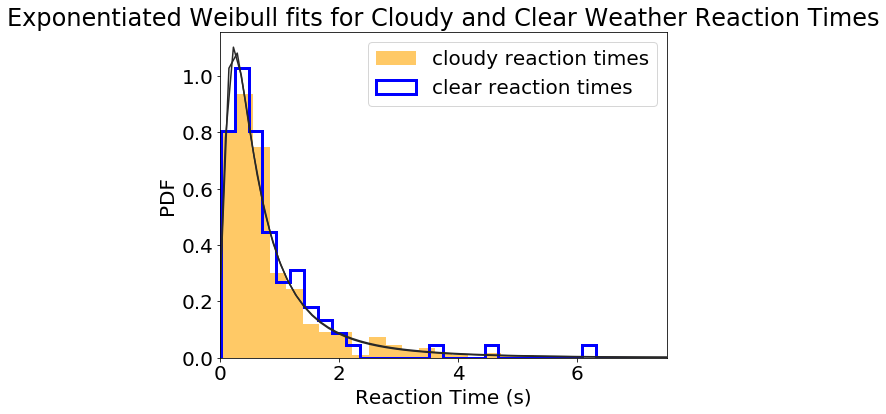

In [43]:
cloudy_rxntime = disf[disf['Weather']=='cloudy']['ReactionTime'].dropna()
clear_rxntime = disf[disf['Weather']=='clear']['ReactionTime'].dropna()

plt.figure(figsize=(8,6))
sns.distplot(cloudy_rxntime, kde=False, fit=st.exponweib, bins=90, label = 'cloudy reaction times', hist_kws={"linewidth": 3,
                            "alpha": 0.6, "color": "orange"})
sns.distplot(clear_rxntime, kde=False, fit=st.exponweib, bins=90, label = 'clear reaction times', hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "blue"})
plt.xlim([0,7.5])
plt.ylabel('PDF')
plt.xlabel('Reaction Time (s)')
plt.title('Exponentiated Weibull fits for Cloudy and Clear Weather Reaction Times')
plt.legend()
plt.show()